In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
tf.random.set_seed(42)
np.random.seed(42)
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv(
    'data/car.data',names=['buying1','buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
)
data.drop('buying1', axis=1, inplace=True)
data

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,2,2,small,low,unacc
1,vhigh,2,2,small,med,unacc
2,vhigh,2,2,small,high,unacc
3,vhigh,2,2,med,low,unacc
4,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...
1723,low,5more,more,med,med,good
1724,low,5more,more,med,high,vgood
1725,low,5more,more,big,low,unacc
1726,low,5more,more,big,med,good


In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,2,2,small,low,unacc
1,vhigh,2,2,small,med,unacc
2,vhigh,2,2,small,high,unacc
3,vhigh,2,2,med,low,unacc
4,vhigh,2,2,med,med,unacc


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [8]:
data.describe().T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,2,432
doors,1728,3,2,576
persons,1728,3,small,576
lug_boot,1728,3,low,576
safety,1728,4,unacc,1210


In [9]:
data1 = pd.get_dummies(data, columns=['buying','maint','doors','persons','lug_boot','safety'])
data1

,buying_high,buying_low,buying_med,buying_vhigh,maint_2,maint_3,maint_4,maint_5more,doors_2,doors_4,...,persons_big,persons_med,persons_small,lug_boot_high,lug_boot_low,lug_boot_med,safety_acc,safety_good,safety_unacc,safety_vgood
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1724,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1725,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1726,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


<Figure size 1440x720 with 0 Axes>

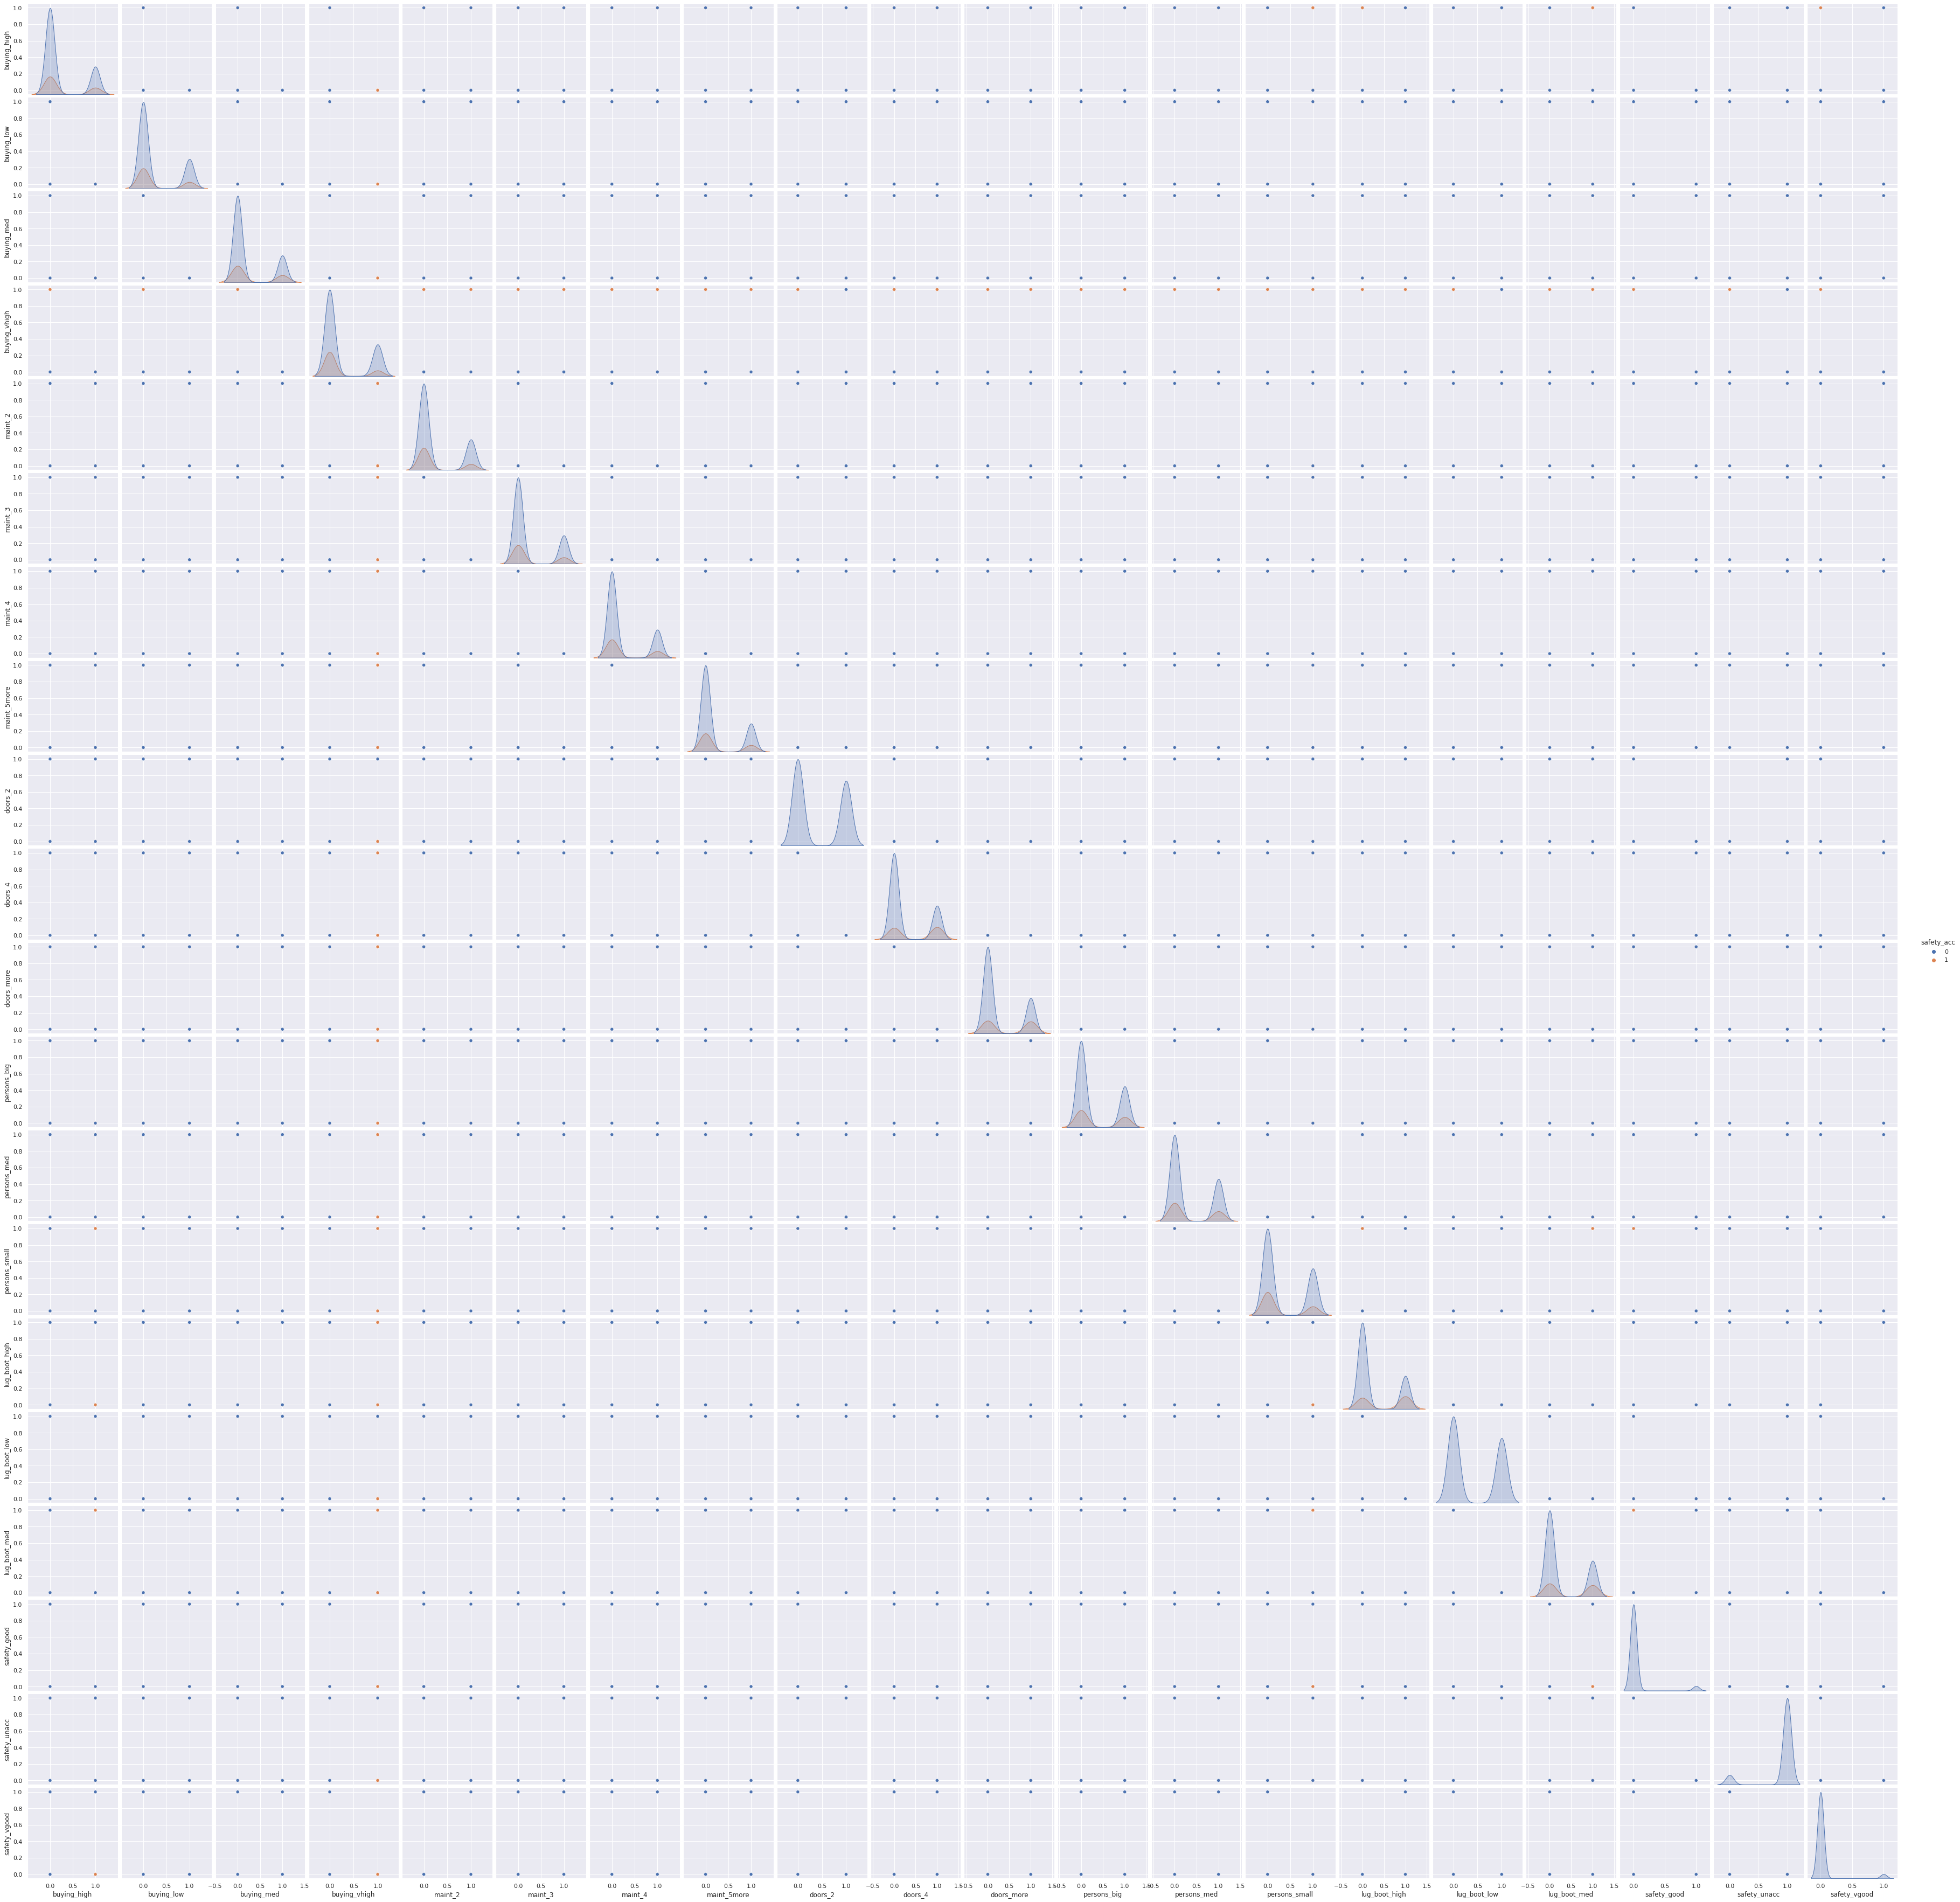

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20, 10))
sns.pairplot(data1, hue='safety_acc')

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(data.safety)

In [10]:
data1.describe().T
data1.columns

Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_2',
       'maint_3', 'maint_4', 'maint_5more', 'doors_2', 'doors_4', 'doors_more',
       'persons_big', 'persons_med', 'persons_small', 'lug_boot_high',
       'lug_boot_low', 'lug_boot_med', 'safety_acc', 'safety_good',
       'safety_unacc', 'safety_vgood'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
  data1.drop(columns=['safety_acc', 'safety_good',
       'safety_unacc', 'safety_vgood']), Y, test_size=0.2, random_state=42
)

In [14]:
xtrain

,buying_high,buying_low,buying_med,buying_vhigh,maint_2,maint_3,maint_4,maint_5more,doors_2,doors_4,doors_more,persons_big,persons_med,persons_small,lug_boot_high,lug_boot_low,lug_boot_med
107,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
901,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
1709,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0
706,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
678,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1294,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1
860,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
1459,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1


## Neural Network Modeling

## Single Neuron

In [15]:
normalizer = tf.keras.layers.Normalization(input_shape=[17,], axis=-1)
normalizer.adapt(xtrain)

In [16]:
model_single_neuron = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu)
])

In [17]:
model_single_neuron.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse', 'mae']
)

In [18]:
model_single_neuron.fit(
    x=xtrain, y=ytrain,
    epochs=20, verbose=2,
    validation_split=0.2
)

Epoch 1/20
35/35 - 1s - loss: 1.9519 - mse: 1.9519 - mae: 1.1440 - val_loss: 1.8656 - val_mse: 1.8656 - val_mae: 1.0811 - 831ms/epoch - 24ms/step
Epoch 2/20
35/35 - 0s - loss: 1.7646 - mse: 1.7646 - mae: 1.0627 - val_loss: 1.7703 - val_mse: 1.7703 - val_mae: 1.0521 - 88ms/epoch - 3ms/step
Epoch 3/20
35/35 - 0s - loss: 1.6497 - mse: 1.6497 - mae: 1.0113 - val_loss: 1.6860 - val_mse: 1.6860 - val_mae: 1.0289 - 67ms/epoch - 2ms/step
Epoch 4/20
35/35 - 0s - loss: 1.5642 - mse: 1.5642 - mae: 0.9826 - val_loss: 1.6041 - val_mse: 1.6041 - val_mae: 1.0029 - 68ms/epoch - 2ms/step
Epoch 5/20
35/35 - 0s - loss: 1.4257 - mse: 1.4257 - mae: 0.9307 - val_loss: 1.4644 - val_mse: 1.4644 - val_mae: 0.9435 - 75ms/epoch - 2ms/step
Epoch 6/20
35/35 - 0s - loss: 1.2331 - mse: 1.2331 - mae: 0.8540 - val_loss: 1.3458 - val_mse: 1.3458 - val_mae: 0.8932 - 77ms/epoch - 2ms/step
Epoch 7/20
35/35 - 0s - loss: 1.0733 - mse: 1.0733 - mae: 0.7952 - val_loss: 1.1736 - val_mse: 1.1736 - val_mae: 0.8478 - 85ms/epoch -

In [19]:
model_single_neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 18        
                                                                 
Total params: 53
Trainable params: 18
Non-trainable params: 35
_________________________________________________________________


In [20]:
history = pd.DataFrame(model_single_neuron.history.history)
history

,loss,mse,mae,val_loss,val_mse,val_mae
0,1.951920,1.951920,1.143981,1.865585,1.865585,1.081079
1,1.764616,1.764616,1.062657,1.770318,1.770318,1.052064
2,1.649667,1.649667,1.011278,1.686014,1.686014,1.028877
3,1.564226,1.564226,0.982594,1.604087,1.604087,1.002856
4,1.425707,1.425707,0.930748,1.464384,1.464384,0.943487
5,1.233136,1.233136,0.853980,1.345823,1.345823,0.893197
6,1.073331,1.073331,0.795168,1.173599,1.173599,0.847845
7,0.892987,0.892987,0.731240,0.939374,0.939374,0.783211
8,0.653664,0.653664,0.659711,0.690105,0.690105,0.698066
9,0.550674,0.550674,0.604462,0.645881,0.645881,0.662405


In [21]:
history.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [22]:
history['mse']

0     1.951920
1     1.764616
2     1.649667
3     1.564226
4     1.425707
5     1.233136
6     1.073331
7     0.892987
8     0.653664
9     0.550674
10    0.534007
11    0.529152
12    0.528861
13    0.528098
14    0.528291
15    0.528613
16    0.528075
17    0.527510
18    0.528606
19    0.527447
Name: mse, dtype: float64

In [24]:
def plotNN(model):
    history = pd.DataFrame(model.history.history)
    plt.figure(figsize=(18, 10))
    plt.plot(history.index.values, history['loss'], label='Training Error', color='darkorange', linewidth=3)
    plt.plot(history.index.values, history['val_loss'], label='Validation Error', color='lightgreen', linewidth=3)
    plt.legend()
    plt.show()

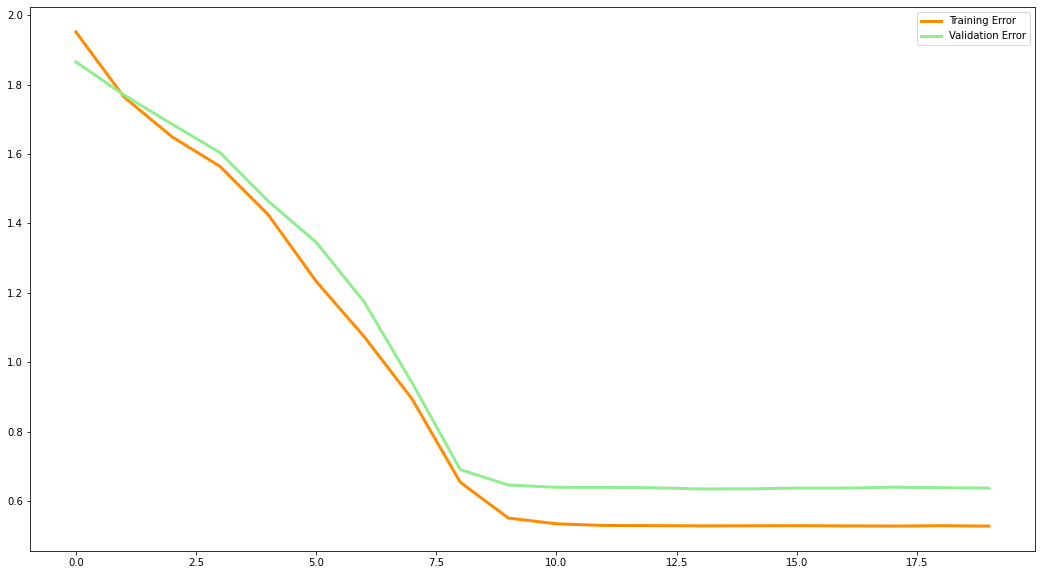

In [25]:
plotNN(model_single_neuron)

## Shallow Neural Network

In [26]:
shallowNN = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu)
])

In [27]:
shallowNN .compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse']
)

In [28]:
shallowNN .fit(
    x=xtrain, y=ytrain,
    epochs=100, verbose=2,
    validation_split=0.2
)

Epoch 1/100
35/35 - 1s - loss: 1.6011 - mse: 1.6011 - val_loss: 0.8758 - val_mse: 0.8758 - 534ms/epoch - 15ms/step
Epoch 2/100
35/35 - 0s - loss: 0.6624 - mse: 0.6624 - val_loss: 0.7165 - val_mse: 0.7165 - 77ms/epoch - 2ms/step
Epoch 3/100
35/35 - 0s - loss: 0.5714 - mse: 0.5714 - val_loss: 0.6801 - val_mse: 0.6801 - 72ms/epoch - 2ms/step
Epoch 4/100
35/35 - 0s - loss: 0.5390 - mse: 0.5390 - val_loss: 0.6567 - val_mse: 0.6567 - 77ms/epoch - 2ms/step
Epoch 5/100
35/35 - 0s - loss: 0.5196 - mse: 0.5196 - val_loss: 0.6372 - val_mse: 0.6372 - 82ms/epoch - 2ms/step
Epoch 6/100
35/35 - 0s - loss: 0.5029 - mse: 0.5029 - val_loss: 0.6227 - val_mse: 0.6227 - 84ms/epoch - 2ms/step
Epoch 7/100
35/35 - 0s - loss: 0.4891 - mse: 0.4891 - val_loss: 0.6158 - val_mse: 0.6158 - 73ms/epoch - 2ms/step
Epoch 8/100
35/35 - 0s - loss: 0.4760 - mse: 0.4760 - val_loss: 0.6070 - val_mse: 0.6070 - 69ms/epoch - 2ms/step
Epoch 9/100
35/35 - 0s - loss: 0.4679 - mse: 0.4679 - val_loss: 0.6044 - val_mse: 0.6044 - 92m

In [29]:
shallowNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                1152      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,252
Trainable params: 1,217
Non-trainable params: 35
_________________________________________________________________


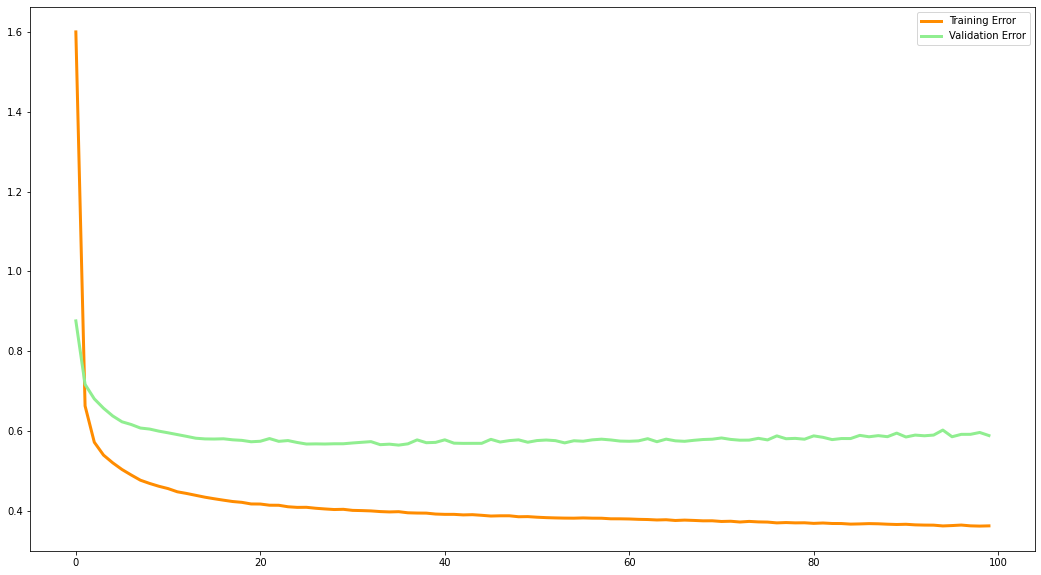

In [30]:
plotNN(shallowNN)

## Deep Neural Network

In [ ]:
deepNN = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=28, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu)
])

In [ ]:
deepNN .compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse']
)

In [ ]:
deepNN .fit(
    x=xtrain, y=ytrain,
    epochs=20, verbose=2,
    validation_split=0.2
)

Epoch 1/20
35/35 - 1s - loss: 0.2353 - mse: 0.2353 - val_loss: 0.2395 - val_mse: 0.2395 - 513ms/epoch - 15ms/step
Epoch 2/20
35/35 - 0s - loss: 0.2275 - mse: 0.2275 - val_loss: 0.2334 - val_mse: 0.2334 - 77ms/epoch - 2ms/step
Epoch 3/20
35/35 - 0s - loss: 0.2230 - mse: 0.2230 - val_loss: 0.2286 - val_mse: 0.2286 - 64ms/epoch - 2ms/step
Epoch 4/20
35/35 - 0s - loss: 0.2203 - mse: 0.2203 - val_loss: 0.2255 - val_mse: 0.2255 - 61ms/epoch - 2ms/step
Epoch 5/20
35/35 - 0s - loss: 0.2183 - mse: 0.2183 - val_loss: 0.2238 - val_mse: 0.2238 - 62ms/epoch - 2ms/step
Epoch 6/20
35/35 - 0s - loss: 0.2166 - mse: 0.2166 - val_loss: 0.2217 - val_mse: 0.2217 - 62ms/epoch - 2ms/step
Epoch 7/20
35/35 - 0s - loss: 0.2152 - mse: 0.2152 - val_loss: 0.2203 - val_mse: 0.2203 - 78ms/epoch - 2ms/step
Epoch 8/20
35/35 - 0s - loss: 0.2138 - mse: 0.2138 - val_loss: 0.2186 - val_mse: 0.2186 - 66ms/epoch - 2ms/step
Epoch 9/20
35/35 - 0s - loss: 0.2125 - mse: 0.2125 - val_loss: 0.2173 - val_mse: 0.2173 - 72ms/epoch -

In [ ]:
deepNN.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normalizat  (None, 17)               35        
 ion)                                                            
                                                                 
 dense_19 (Dense)            (None, 64)                1152      
                                                                 
 dense_20 (Dense)            (None, 28)                1820      
                                                                 
 dense_21 (Dense)            (None, 1)                 29        
                                                                 
Total params: 3,036
Trainable params: 3,001
Non-trainable params: 35
_________________________________________________________________


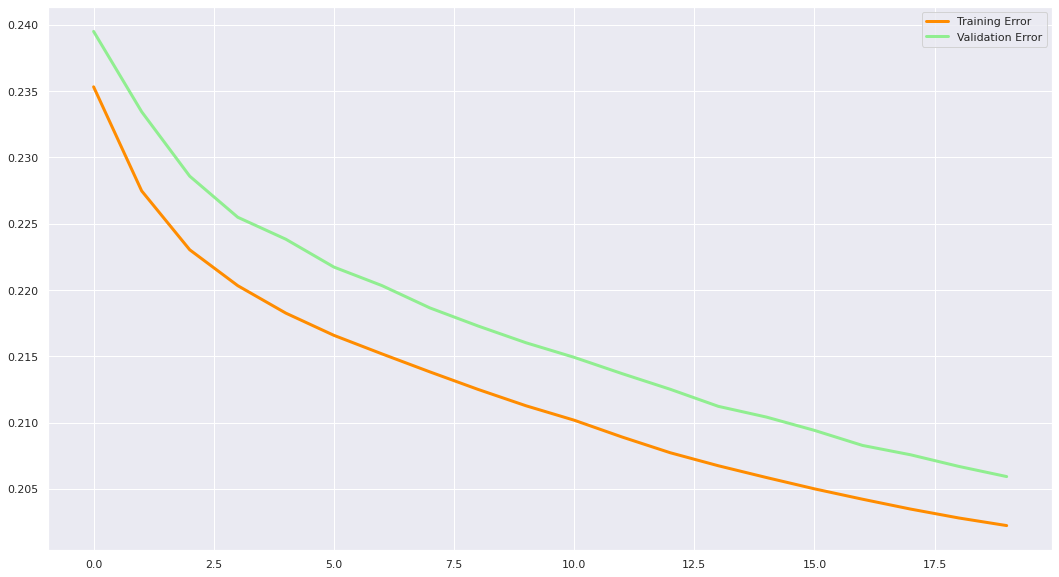

In [ ]:
plotNN(deepNN)

## Complex Model

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    data1[['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_2',
       'maint_3', 'maint_4', 'maint_5more', 'doors_2', 'doors_4', 'doors_more',
       'persons_big', 'persons_med', 'persons_small', 'lug_boot_high',
       'lug_boot_low', 'lug_boot_med', 'safety_acc']], data1[[ 'safety_good',
       'safety_unacc', 'safety_vgood']], test_size=0.2, random_state=42
)

In [ ]:
complex_normalizer = tf.keras.layers.Normalization(input_shape=[18,], axis=-1)
complex_normalizer.adapt(Xtrain)

In [ ]:
complex_NN = tf.keras.Sequential([
    complex_normalizer,
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
])

In [ ]:
complex_NN.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [ ]:
complex_NN.fit(
    Xtrain, Ytrain,
    validation_split=0.2,
    verbose=2, epochs=100
)

Epoch 1/100
35/35 - 0s - loss: 0.2481 - mae: 0.3468 - val_loss: 0.2078 - val_mae: 0.3034 - 478ms/epoch - 14ms/step
Epoch 2/100
35/35 - 0s - loss: 0.2095 - mae: 0.3301 - val_loss: 0.1947 - val_mae: 0.3326 - 62ms/epoch - 2ms/step
Epoch 3/100
35/35 - 0s - loss: 0.1984 - mae: 0.3435 - val_loss: 0.1849 - val_mae: 0.3302 - 63ms/epoch - 2ms/step
Epoch 4/100
35/35 - 0s - loss: 0.1883 - mae: 0.3490 - val_loss: 0.1771 - val_mae: 0.3363 - 75ms/epoch - 2ms/step
Epoch 5/100
35/35 - 0s - loss: 0.1814 - mae: 0.3505 - val_loss: 0.1731 - val_mae: 0.3343 - 76ms/epoch - 2ms/step
Epoch 6/100
35/35 - 0s - loss: 0.1788 - mae: 0.3508 - val_loss: 0.1720 - val_mae: 0.3327 - 68ms/epoch - 2ms/step
Epoch 7/100
35/35 - 0s - loss: 0.1779 - mae: 0.3512 - val_loss: 0.1711 - val_mae: 0.3339 - 65ms/epoch - 2ms/step
Epoch 8/100
35/35 - 0s - loss: 0.1775 - mae: 0.3509 - val_loss: 0.1708 - val_mae: 0.3326 - 79ms/epoch - 2ms/step
Epoch 9/100
35/35 - 0s - loss: 0.1772 - mae: 0.3506 - val_loss: 0.1706 - val_mae: 0.3331 - 79m

In [ ]:
complex_NN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 18)               37        
 ion)                                                            
                                                                 
 dense_22 (Dense)            (None, 64)                1216      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,318
Trainable params: 1,281
Non-trainable params: 37
_________________________________________________________________


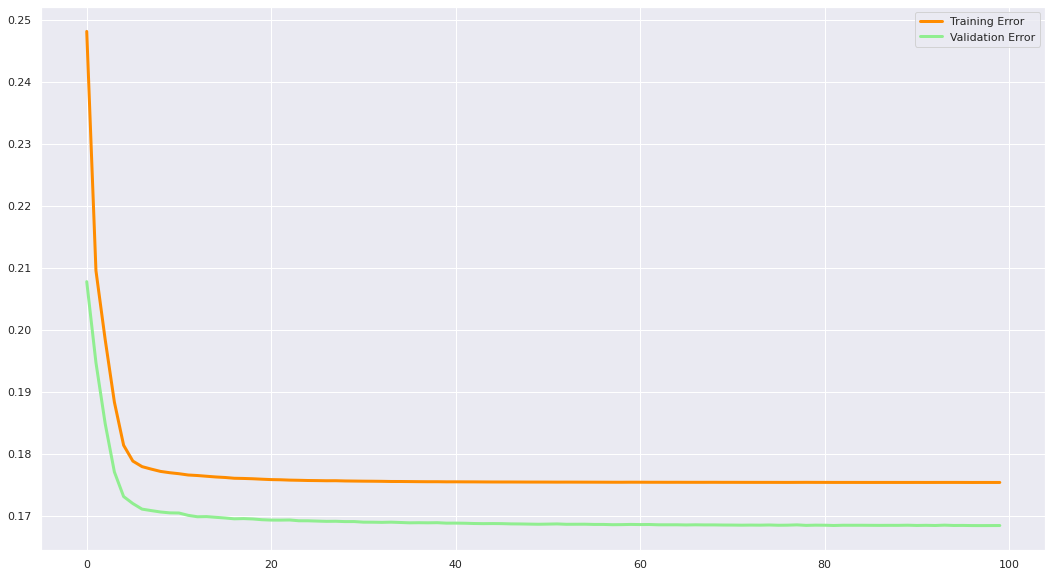

In [ ]:
plotNN(complex_NN)

## Classification Model

In [31]:
data2=data.copy()
data2

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,2,2,small,low,unacc
1,vhigh,2,2,small,med,unacc
2,vhigh,2,2,small,high,unacc
3,vhigh,2,2,med,low,unacc
4,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...
1723,low,5more,more,med,med,good
1724,low,5more,more,med,high,vgood
1725,low,5more,more,big,low,unacc
1726,low,5more,more,big,med,good


In [32]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data2.safety = encoder.fit_transform(data2.safety)
data2.lug_boot = encoder.fit_transform(data2.lug_boot)
data2.persons = encoder.fit_transform(data2.persons)
data2.doors = encoder.fit_transform(data2.doors)
data2.maint = encoder.fit_transform(data2.maint)
data2.buying = encoder.fit_transform(data2.buying)
data2

,buying,maint,doors,persons,lug_boot,safety
0,3,0,0,2,1,2
1,3,0,0,2,2,2
2,3,0,0,2,0,2
3,3,0,0,1,1,2
4,3,0,0,1,2,2
...,...,...,...,...,...,...
1723,1,3,2,1,2,1
1724,1,3,2,1,0,3
1725,1,3,2,0,1,2
1726,1,3,2,0,2,1


In [33]:
data2.shape,  data2[['buying','maint','doors','persons','lug_boot']].shape,   encoder.fit_transform(data2.safety).shape


((1728, 6), (1728, 5), (1728,))

In [34]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit_transform(data2.safety)


array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [35]:
feature_normalizer = tf.keras.layers.Normalization(input_shape=[5,], axis=-1)
feature_normalizer.adapt(data2[['buying','maint','doors','persons','lug_boot']])

In [36]:
classifier = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=10, input_dim=5, activation='tanh'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

In [37]:
classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
classifier.fit(
   x=data2[['buying','maint','doors','persons','lug_boot']].values,
    y=encoder.fit_transform(data2.safety),
    validation_split=0.25,
    verbose=2, epochs=50
)

Epoch 1/50
41/41 - 1s - loss: 1.3768 - accuracy: 0.4321 - val_loss: 1.2947 - val_accuracy: 0.4491 - 618ms/epoch - 15ms/step
Epoch 2/50
41/41 - 0s - loss: 1.2395 - accuracy: 0.5131 - val_loss: 1.2098 - val_accuracy: 0.4954 - 80ms/epoch - 2ms/step
Epoch 3/50
41/41 - 0s - loss: 1.1287 - accuracy: 0.5810 - val_loss: 1.1464 - val_accuracy: 0.5440 - 95ms/epoch - 2ms/step
Epoch 4/50
41/41 - 0s - loss: 1.0331 - accuracy: 0.6173 - val_loss: 1.0940 - val_accuracy: 0.5532 - 97ms/epoch - 2ms/step
Epoch 5/50
41/41 - 0s - loss: 0.9481 - accuracy: 0.6597 - val_loss: 1.0516 - val_accuracy: 0.5486 - 99ms/epoch - 2ms/step
Epoch 6/50
41/41 - 0s - loss: 0.8716 - accuracy: 0.6921 - val_loss: 1.0203 - val_accuracy: 0.5694 - 92ms/epoch - 2ms/step
Epoch 7/50
41/41 - 0s - loss: 0.8063 - accuracy: 0.7083 - val_loss: 1.0043 - val_accuracy: 0.5718 - 89ms/epoch - 2ms/step
Epoch 8/50
41/41 - 0s - loss: 0.7524 - accuracy: 0.7106 - val_loss: 0.9954 - val_accuracy: 0.5787 - 86ms/epoch - 2ms/step
Epoch 9/50
41/41 - 0s 

In [39]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
 dense_4 (Dense)             (None, 4)                 44        
                                                                 
Total params: 115
Trainable params: 104
Non-trainable params: 11
_________________________________________________________________


In [40]:
history = pd.DataFrame(classifier.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,1.376833,0.432099,1.294708,0.449074
1,1.239520,0.513117,1.209777,0.495370
2,1.128707,0.581019,1.146436,0.543981
3,1.033075,0.617284,1.094008,0.553241
4,0.948131,0.659722,1.051643,0.548611
5,0.871613,0.692130,1.020264,0.569444
6,0.806281,0.708333,1.004321,0.571759
7,0.752441,0.710648,0.995441,0.578704
8,0.711975,0.727623,0.996118,0.585648
9,0.682895,0.726852,1.005717,0.583333


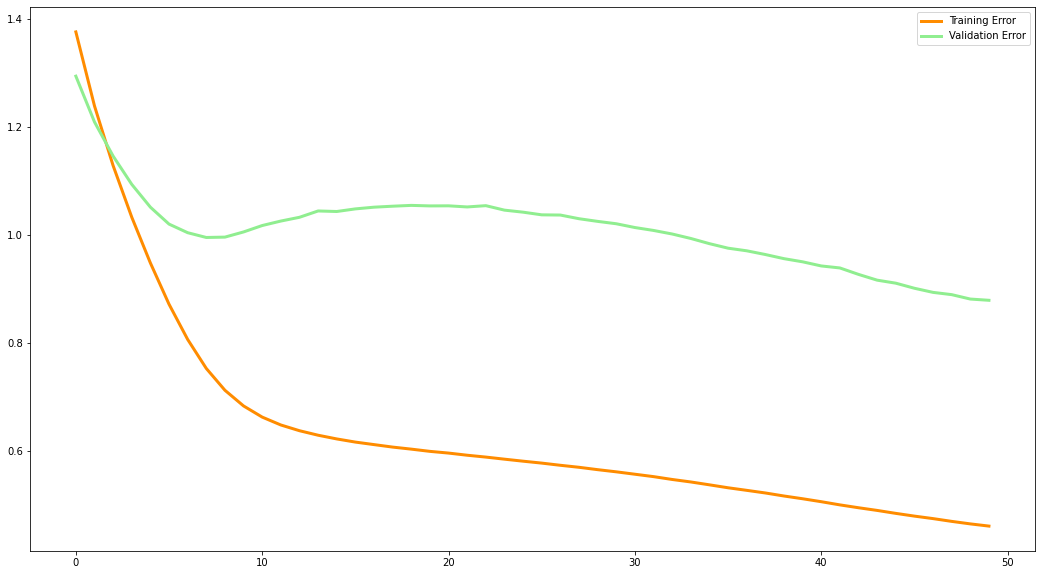

In [41]:
plotNN(classifier)

# Classification Model2

In [46]:
data3 = pd.get_dummies(data, columns=['buying','maint','doors','persons','lug_boot'])
data3

,safety,buying_high,buying_low,buying_med,buying_vhigh,maint_2,maint_3,maint_4,maint_5more,doors_2,doors_4,doors_more,persons_big,persons_med,persons_small,lug_boot_high,lug_boot_low,lug_boot_med
0,unacc,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,good,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
1724,vgood,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
1725,unacc,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
1726,good,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1


In [47]:
data3.columns

Index(['safety', 'buying_high', 'buying_low', 'buying_med', 'buying_vhigh',
       'maint_2', 'maint_3', 'maint_4', 'maint_5more', 'doors_2', 'doors_4',
       'doors_more', 'persons_big', 'persons_med', 'persons_small',
       'lug_boot_high', 'lug_boot_low', 'lug_boot_med'],
      dtype='object')

In [48]:
feature_normalizer3 = tf.keras.layers.Normalization(input_shape=[17,], axis=-1)
feature_normalizer3.adapt(data3[['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_2',
       'maint_3', 'maint_4', 'maint_5more', 'doors_2', 'doors_4', 'doors_more',
       'persons_big', 'persons_med', 'persons_small', 'lug_boot_high',
       'lug_boot_low', 'lug_boot_med']])

In [49]:
classifier3 = tf.keras.Sequential([
    feature_normalizer3,
    tf.keras.layers.Dense(units=17, input_dim=17, activation='tanh'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

In [50]:
classifier3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [51]:
classifier3.fit(
   x=data3[['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_2',
       'maint_3', 'maint_4', 'maint_5more', 'doors_2', 'doors_4', 'doors_more',
       'persons_big', 'persons_med', 'persons_small', 'lug_boot_high',
       'lug_boot_low', 'lug_boot_med']].values,
    y=encoder.fit_transform(data.safety),
    validation_split=0.25,
    verbose=2, epochs=50
)

Epoch 1/50
41/41 - 1s - loss: 1.4677 - accuracy: 0.2037 - val_loss: 1.3267 - val_accuracy: 0.3519 - 608ms/epoch - 15ms/step
Epoch 2/50
41/41 - 0s - loss: 1.2233 - accuracy: 0.4776 - val_loss: 1.1476 - val_accuracy: 0.5694 - 87ms/epoch - 2ms/step
Epoch 3/50
41/41 - 0s - loss: 1.0384 - accuracy: 0.6790 - val_loss: 1.0117 - val_accuracy: 0.6829 - 98ms/epoch - 2ms/step
Epoch 4/50
41/41 - 0s - loss: 0.8898 - accuracy: 0.7940 - val_loss: 0.9079 - val_accuracy: 0.7130 - 96ms/epoch - 2ms/step
Epoch 5/50
41/41 - 0s - loss: 0.7702 - accuracy: 0.8279 - val_loss: 0.8339 - val_accuracy: 0.7130 - 95ms/epoch - 2ms/step
Epoch 6/50
41/41 - 0s - loss: 0.6729 - accuracy: 0.8472 - val_loss: 0.7857 - val_accuracy: 0.7222 - 99ms/epoch - 2ms/step
Epoch 7/50
41/41 - 0s - loss: 0.5961 - accuracy: 0.8580 - val_loss: 0.7573 - val_accuracy: 0.7037 - 93ms/epoch - 2ms/step
Epoch 8/50
41/41 - 0s - loss: 0.5348 - accuracy: 0.8588 - val_loss: 0.7395 - val_accuracy: 0.6968 - 92ms/epoch - 2ms/step
Epoch 9/50
41/41 - 0s 

In [52]:
classifier3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 17)               35        
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 17)                306       
                                                                 
 dense_8 (Dense)             (None, 4)                 72        
                                                                 
Total params: 413
Trainable params: 378
Non-trainable params: 35
_________________________________________________________________


In [53]:
history = pd.DataFrame(classifier3.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,1.467709,0.203704,1.326656,0.351852
1,1.223290,0.477623,1.147629,0.569444
2,1.038358,0.679012,1.011668,0.682870
3,0.889786,0.793981,0.907864,0.712963
4,0.770158,0.827932,0.833858,0.712963
5,0.672912,0.847222,0.785715,0.722222
6,0.596103,0.858025,0.757261,0.703704
7,0.534752,0.858796,0.739453,0.696759
8,0.485964,0.860340,0.725230,0.689815
9,0.448174,0.864969,0.730536,0.678241


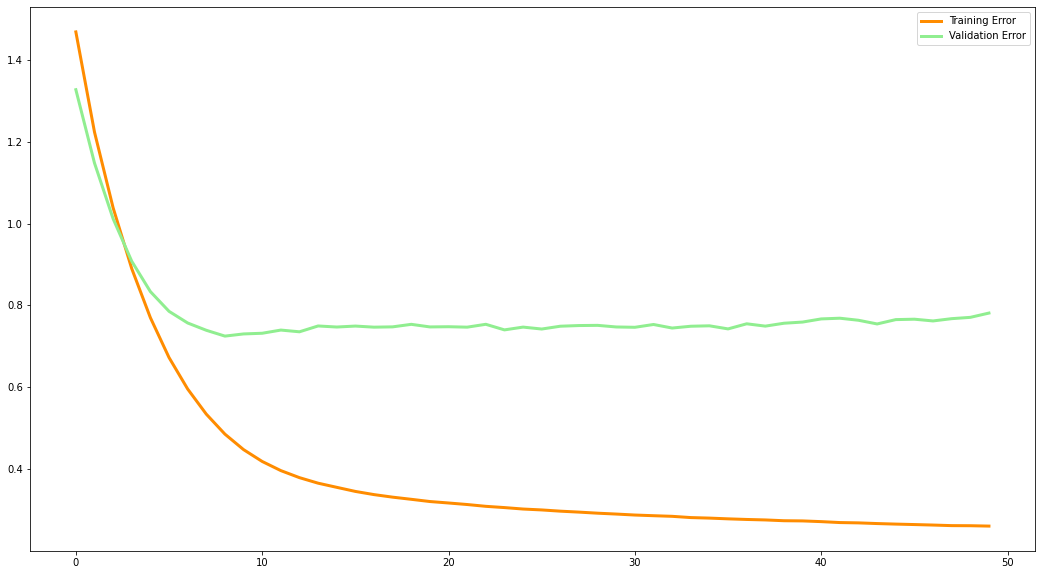

In [54]:
plotNN(classifier3)

# Testing and Evaluation

In [55]:
model_single_neuron.evaluate(xtest, ytest)

11/11 [==============================] - 0s 2ms/step - loss: 0.6200 - mse: 0.6200 - mae: 0.6094


[0.6199887990951538, 0.6199887990951538, 0.6093994379043579]

In [58]:
shallowNN.evaluate(xtest, ytest)

11/11 [==============================] - 0s 2ms/step - loss: 0.6370 - mse: 0.6370


[0.6370207667350769, 0.6370207667350769]

In [57]:
deepNN.evaluate(xtest, ytest)

NameError: ignored

In [ ]:
complex_NN.evaluate(Xtest, Ytest)

11/11 [==============================] - 0s 2ms/step - loss: 0.1696 - mae: 0.3380


[0.16958525776863098, 0.337968111038208]

In [ ]:
complex_NN.predict(Xtest)

array([[0.33589616],
       [0.        ],
       [0.33554283],
       [0.        ],
       [0.33602402],
       [0.        ],
       [0.3760482 ],
       [0.33684292],
       [0.34149817],
       [0.3346857 ],
       [0.36557487],
       [0.        ],
       [0.33337542],
       [0.33580464],
       [0.34620088],
       [0.33294404],
       [0.32656756],
       [0.3370878 ],
       [0.33175537],
       [0.        ],
       [0.33909005],
       [0.        ],
       [0.        ],
       [0.33706784],
       [0.        ],
       [0.28216302],
       [0.3397384 ],
       [0.38715658],
       [0.33652917],
       [0.33607087],
       [0.        ],
       [0.3284714 ],
       [0.288112  ],
       [0.3339163 ],
       [0.        ],
       [0.        ],
       [0.27509105],
       [0.33974218],
       [0.33941925],
       [0.3241245 ],
       [0.32713792],
       [0.34222147],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.3388751 ],
       [0.3335433 ],
       [0.326